# RMSprop
### Root Mean Square propogation .
#### This is similar to "Adagrad Optimizer" just here we give the importance to the weights i.e the old weights are given less importance and new weights are given more importance lead to the shift in the direction at other axis and always reach to the global minimum
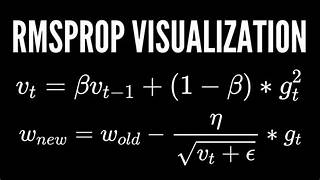

#### From the image it is clearly seen that the v(t) is in the exponentially weighted average form lead to importnace given to the weights and the B(beta) here is the decay factor
#### And this optimizer as no drawbacks
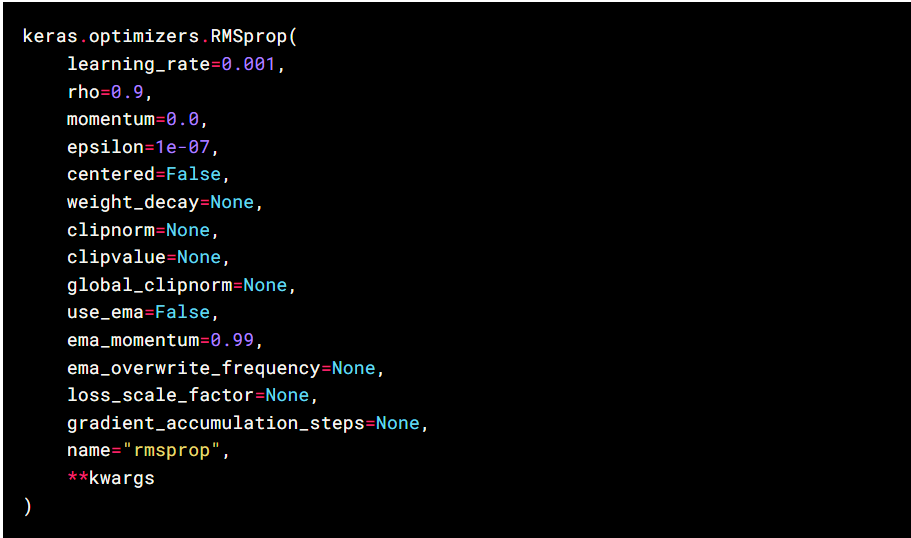

#### here the rho(beta) is the decay factor i.e the importance value to the weights
#### The momentum is the extra parameter used to give the accleration to let to more fast reach to the end

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adagrad,RMSprop

In [2]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.2515)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
### building the model
model = Sequential([
    Dense(10,activation='relu',input_dim=2),
    Dense(5,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
### Compiling the model
rms_prop = RMSprop(
    learning_rate = 0.01, ## learning rate (lr)
    epsilon = 1e-7, ##eposilon (E)
    rho = 0.9 ## beta
)
model.compile(optimizer=rms_prop,loss='binary_crossentropy')

In [8]:
history = model.fit(
    X_train,y_train,
    epochs=100
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7155
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6469
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6137
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5941
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5652
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5343
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4997
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4668
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4346
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3819
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3895
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3760
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3166
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3268
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2916
Epoch 16/100
3/3 ━━

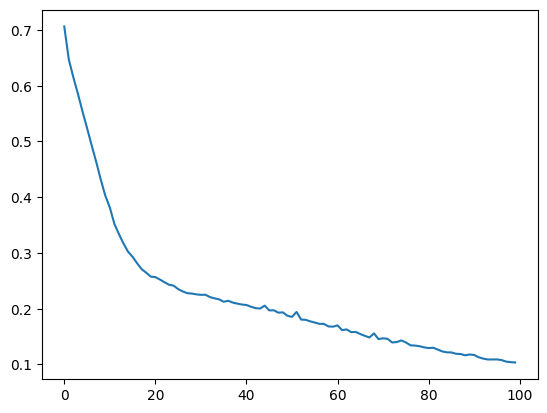

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])